## **Classification of Machine Failures**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
df.shape

(10000, 14)

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [9]:

df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [10]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [11]:
df['Type'] = df['Type'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UDI                      10000 non-null  int64   
 1   Product ID               10000 non-null  object  
 2   Type                     10000 non-null  category
 3   Air temperature [K]      10000 non-null  float64 
 4   Process temperature [K]  10000 non-null  float64 
 5   Rotational speed [rpm]   10000 non-null  int64   
 6   Torque [Nm]              10000 non-null  float64 
 7   Tool wear [min]          10000 non-null  int64   
 8   Machine failure          10000 non-null  int64   
 9   TWF                      10000 non-null  int64   
 10  HDF                      10000 non-null  int64   
 11  PWF                      10000 non-null  int64   
 12  OSF                      10000 non-null  int64   
 13  RNF                      10000 non-null  int64   
dtypes: cate

In [13]:
df.set_index(['UDI'],inplace = True)

In [14]:
df['Type'] = df['Type'].map({'L': 1 , 'M': 2,'H': 3})
df['Type']

UDI
1        2
2        1
3        1
4        1
5        1
        ..
9996     2
9997     3
9998     2
9999     3
10000    2
Name: Type, Length: 10000, dtype: category
Categories (3, int64): [3, 1, 2]

In [15]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [16]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [ ]:
#df['Product ID'] = df['Product ID'].replace('M','')
#df['Product ID']

In [17]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df['Product ID'] = df['Product ID'].str.replace("[MLH]",'')


In [ ]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product ID               10000 non-null  object  
 1   Type                     10000 non-null  category
 2   Air temperature [K]      10000 non-null  float64 
 3   Process temperature [K]  10000 non-null  float64 
 4   Rotational speed [rpm]   10000 non-null  int64   
 5   Torque [Nm]              10000 non-null  float64 
 6   Tool wear [min]          10000 non-null  int64   
 7   Machine failure          10000 non-null  int64   
 8   TWF                      10000 non-null  int64   
 9   HDF                      10000 non-null  int64   
 10  PWF                      10000 non-null  int64   
 11  OSF                      10000 non-null  int64   
 12  RNF                      10000 non-null  int64   
dtypes: category(1), float64(3), int64(8), object(1)
memory usage:

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


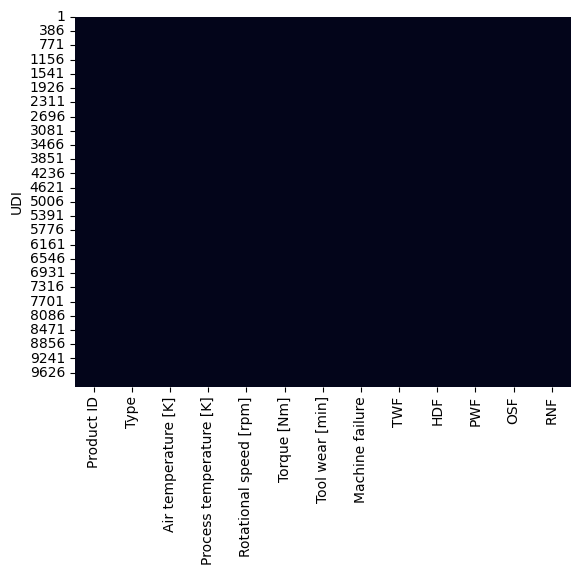

In [19]:
print(df.isnull().sum())
#visualizing the null values using heatmap
sns.heatmap(df.isnull(),cbar = False)
plt.show()

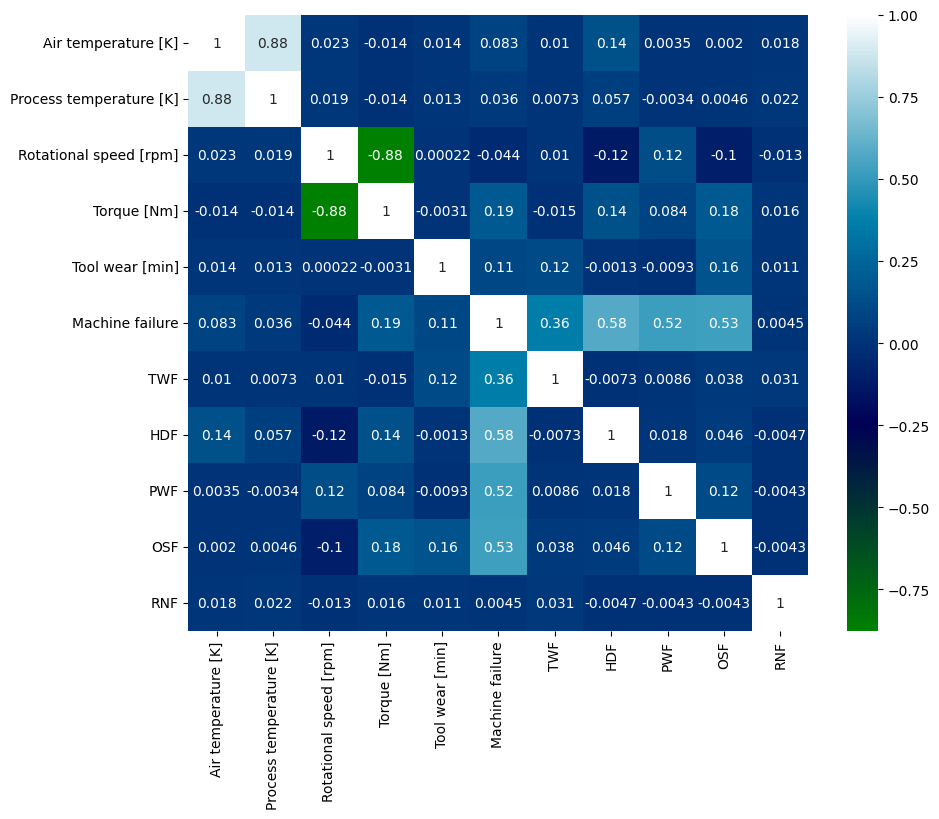

In [20]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(),annot = True,cmap='ocean')
plt.show()

### Visualization

In [21]:
import seaborn as sns

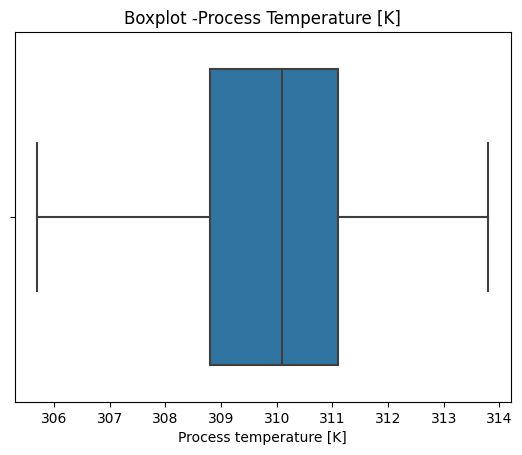

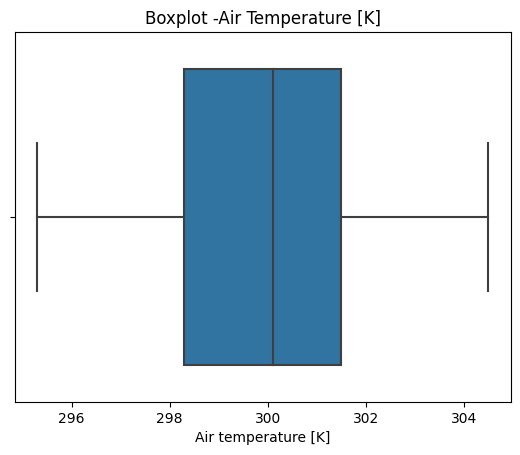

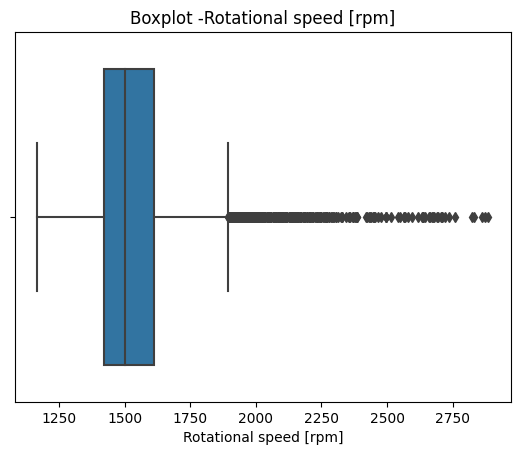

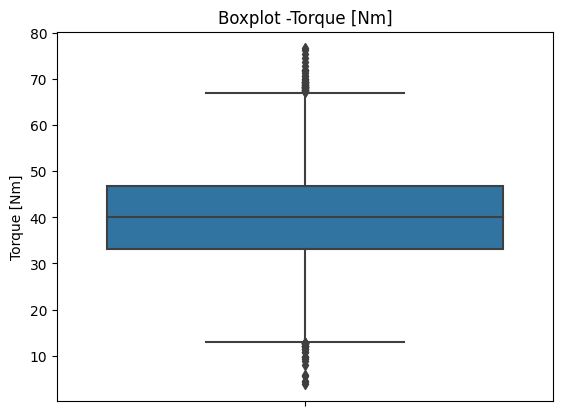

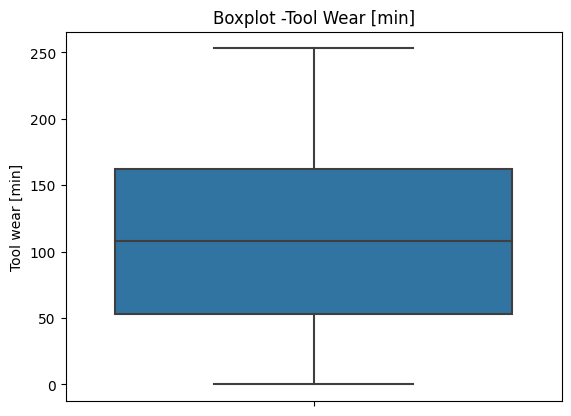

In [22]:
sns.boxplot(x = 'Process temperature [K]',data = df)
plt.title('Boxplot -'+'Process Temperature [K]')
plt.show()

sns.boxplot(x = 'Air temperature [K]',data =df)
plt.title('Boxplot -'+'Air Temperature [K]')
plt.show()

sns.boxplot(x= 'Rotational speed [rpm]',data = df)
plt.title('Boxplot -'+'Rotational speed [rpm]')
plt.show()

sns.boxplot(y='Torque [Nm]',data=df)
plt.title('Boxplot -'+'Torque [Nm]')
plt.show()

sns.boxplot(y = 'Tool wear [min]',data = df)
plt.title('Boxplot -'+'Tool Wear [min]')
plt.show()

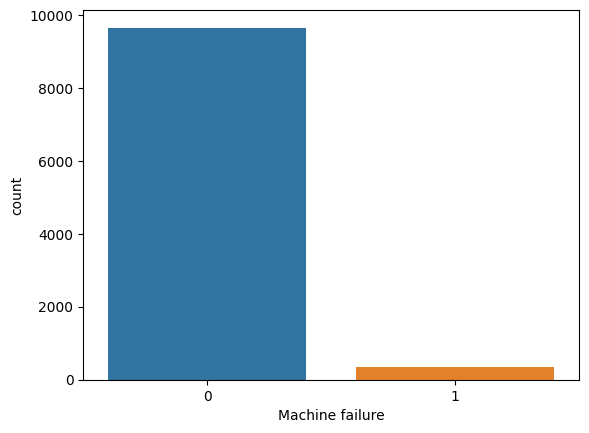

In [23]:
sns.countplot(x ='Machine failure',data = df)
plt.show()

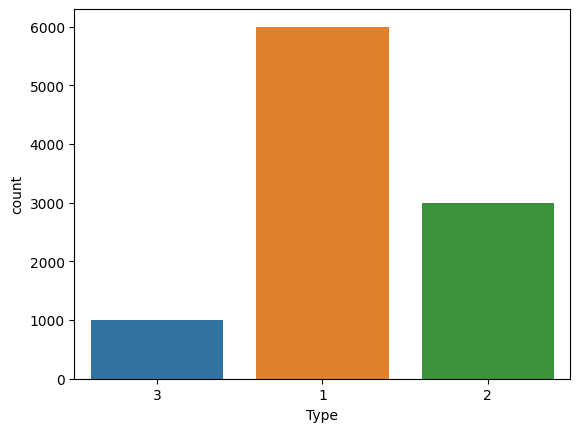

In [24]:
sns.countplot(x = 'Type',data=df)
plt.show()

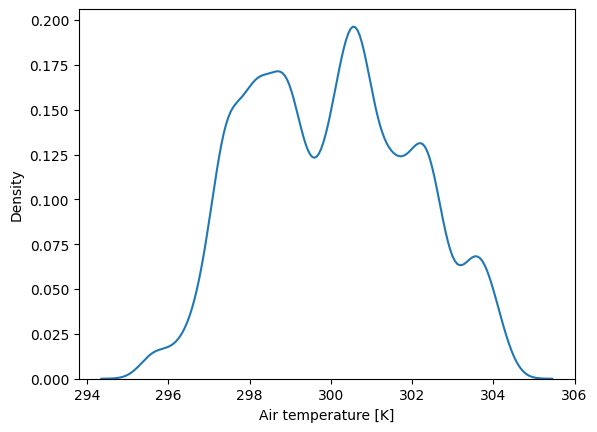

In [25]:
sns.kdeplot(x= 'Air temperature [K]',data = df)
plt.show()

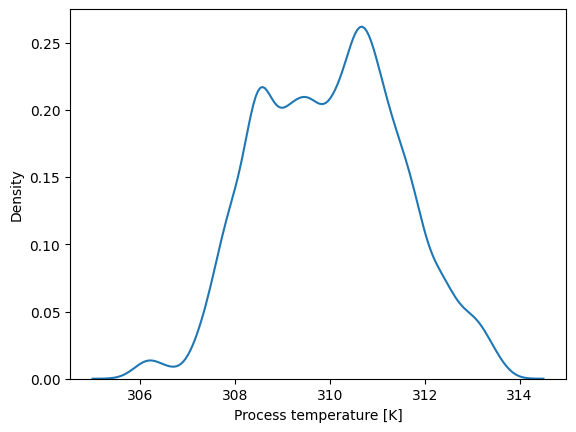

In [26]:
sns.kdeplot(x= 'Process temperature [K]',data = df)
plt.show()

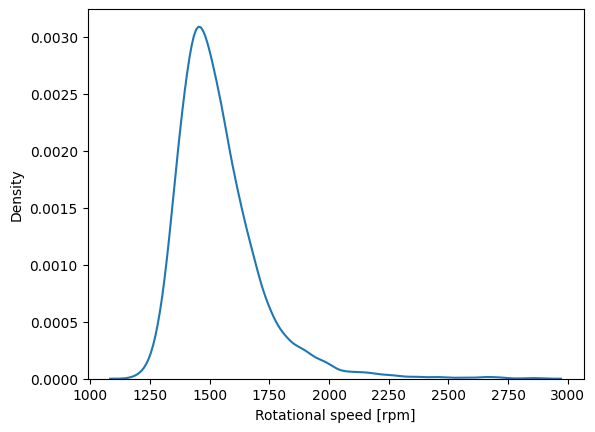

In [27]:
sns.kdeplot(x= 'Rotational speed [rpm]',data = df)
plt.show()

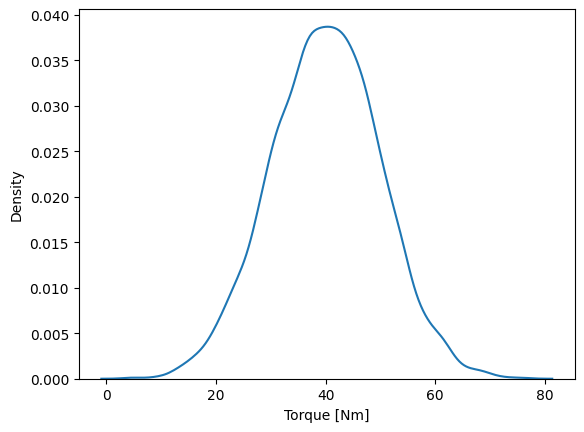

In [28]:
sns.kdeplot(x= 'Torque [Nm]',data = df)
plt.show()

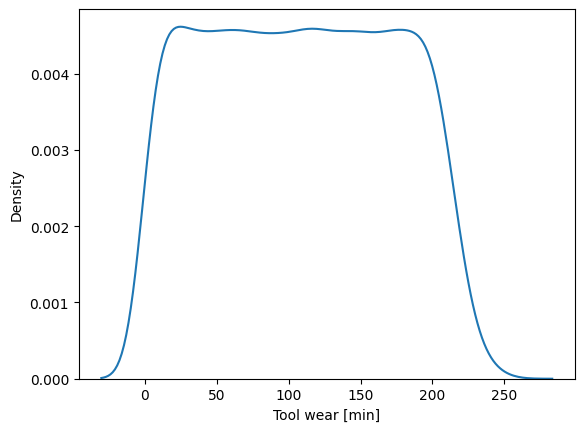

In [29]:
sns.kdeplot(x= 'Tool wear [min]',data = df)
plt.show()

<Axes: title={'center': 'Air temperature [K]'}, xlabel='Machine failure'>

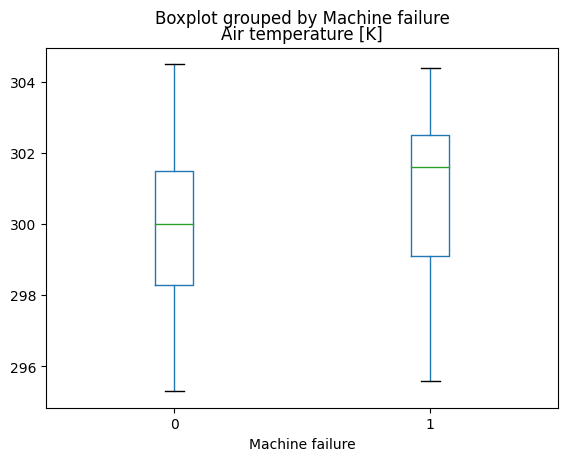

In [30]:
df.boxplot(by = 'Machine failure',column = ['Air temperature [K]'], grid = False)


<Axes: title={'center': 'Process temperature [K]'}, xlabel='Machine failure'>

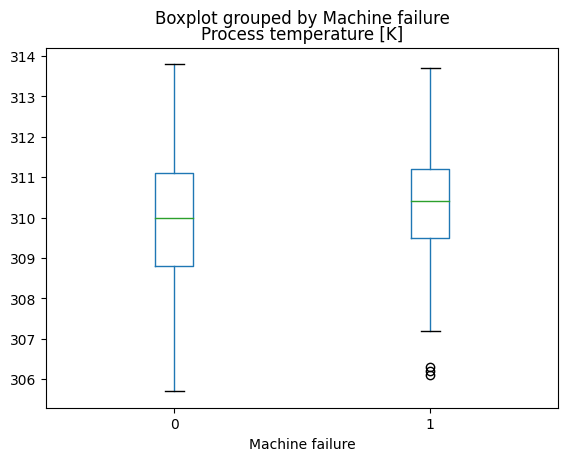

In [31]:
df.boxplot(by = 'Machine failure',column = ['Process temperature [K]'], grid = False)


<Axes: title={'center': 'Rotational speed [rpm]'}, xlabel='Machine failure'>

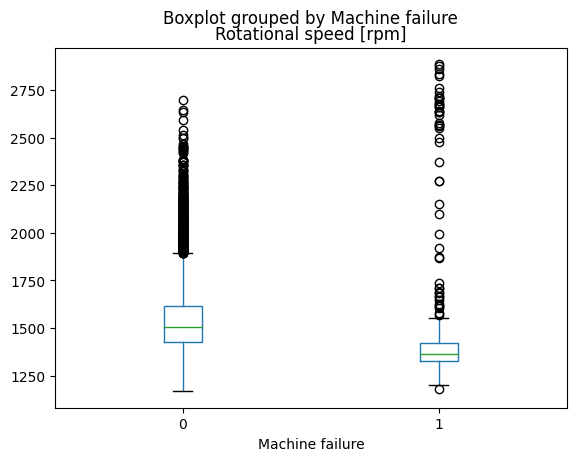

In [32]:
df.boxplot(by = 'Machine failure',column = ['Rotational speed [rpm]'], grid = False)

<Axes: title={'center': 'Torque [Nm]'}, xlabel='Machine failure'>

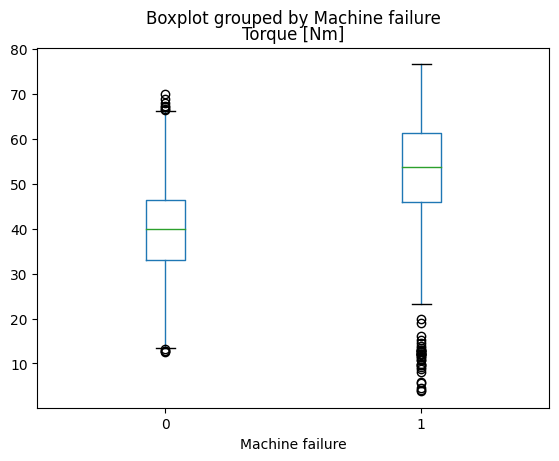

In [33]:
df.boxplot(by = 'Machine failure',column = ['Torque [Nm]'], grid = False)

<Axes: title={'center': 'Tool wear [min]'}, xlabel='Machine failure'>

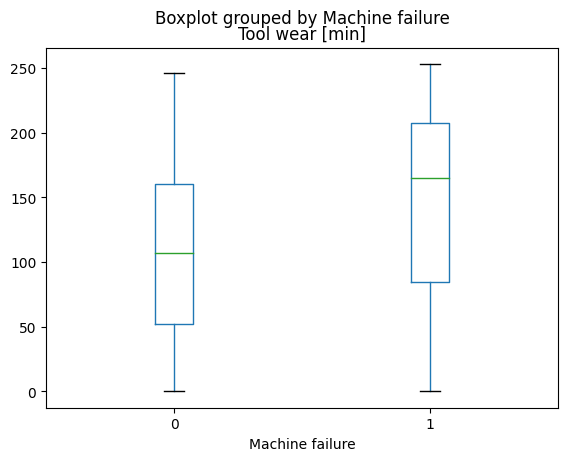

In [34]:
df.boxplot(by = 'Machine failure',column = ['Tool wear [min]'], grid = False)

<Axes: title={'center': 'Machine failure'}, xlabel='Type'>

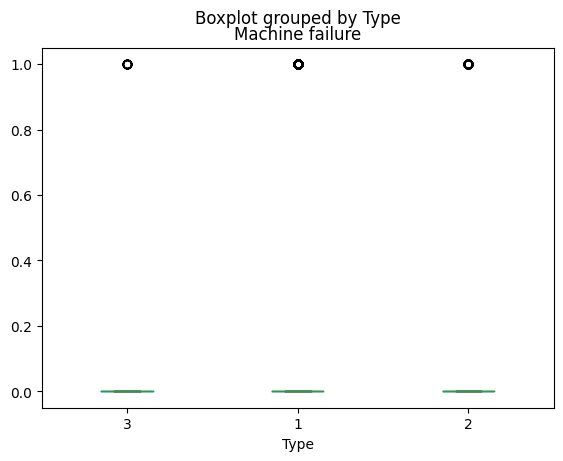

In [35]:
df.boxplot(by ='Type',column = ['Machine failure'],grid = False)

In [36]:
df = df.rename(columns = {'Machine failure' : 'Target'})
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,3,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


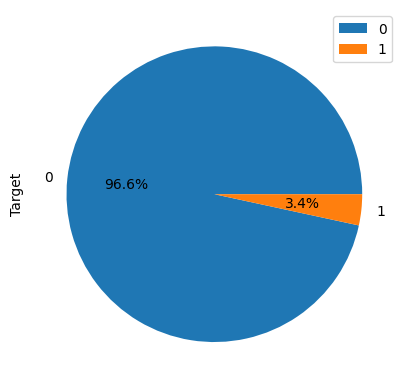

In [37]:
df['Target'].value_counts().plot(kind = 'pie',autopct = '%1.01f%%')
plt.legend()
plt.show()

In [38]:
print(df['TWF'].value_counts())
print(df['HDF'].value_counts())
print(df['PWF'].value_counts())
print(df['OSF'].value_counts())
print(df['RNF'].value_counts())

0    9954
1      46
Name: TWF, dtype: int64
0    9885
1     115
Name: HDF, dtype: int64
0    9905
1      95
Name: PWF, dtype: int64
0    9902
1      98
Name: OSF, dtype: int64
0    9981
1      19
Name: RNF, dtype: int64


In [39]:
#creating a dataframe of attributes that result in machine failure
data = {'subnodes':['TWF','HDF','PWF','OSF','RNF'],'failure':[46,115,95,98,19]}
subnodes = pd.DataFrame(data)
subnodes

,subnodes,failure
0,TWF,46
1,HDF,115
2,PWF,95
3,OSF,98
4,RNF,19


In [42]:
sns.pairplot(data=df,hue = 'Target')

Output hidden; open in https://colab.research.google.com to view.

In [43]:
df.nunique()

Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

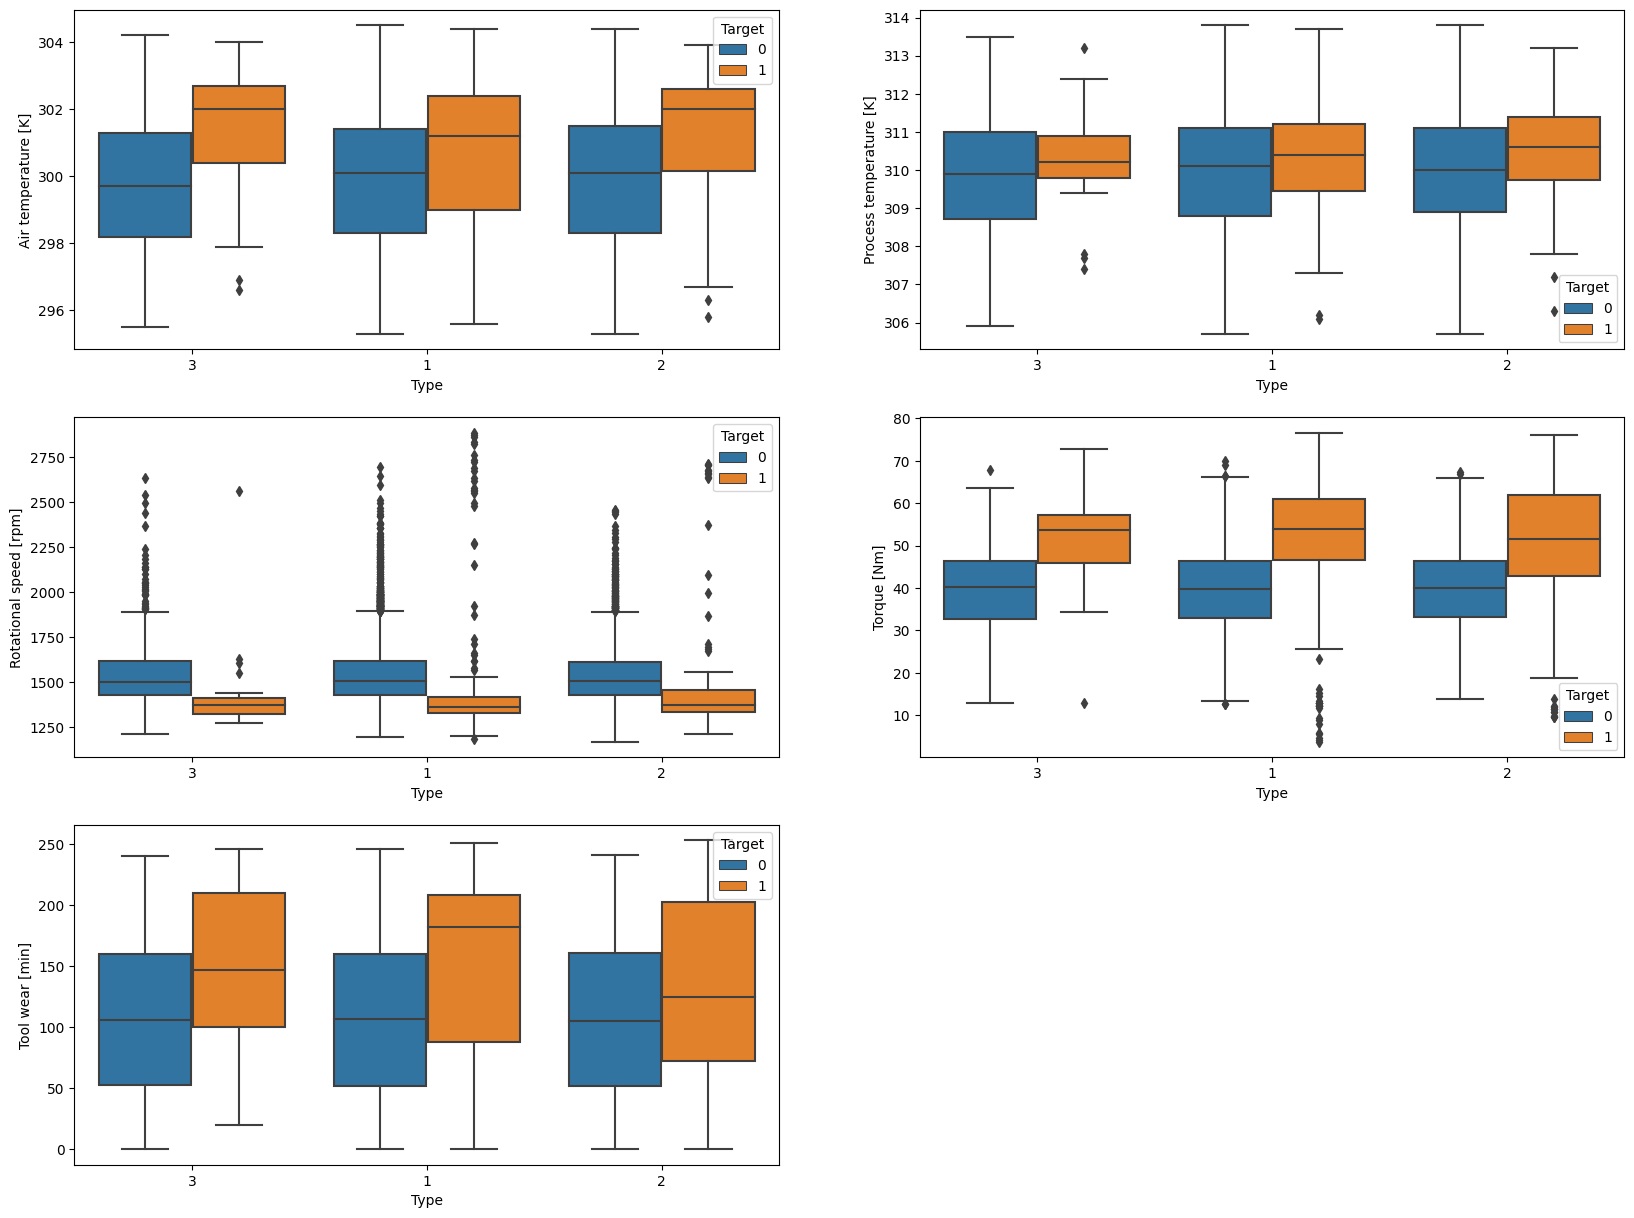

In [44]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

<Axes: xlabel='Type', ylabel='count'>

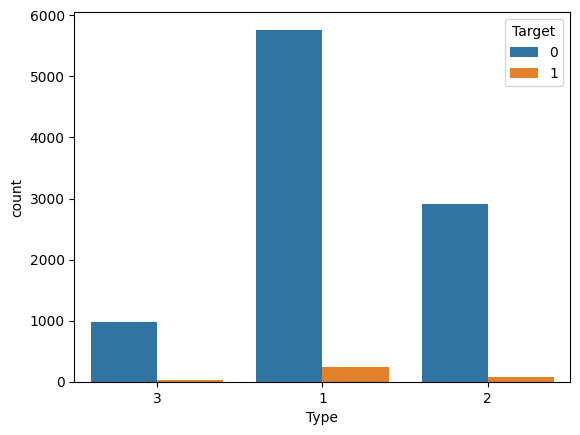

In [45]:
sns.countplot(x='Type',data=df,hue='Target')

### **Outlier detection & treatment**

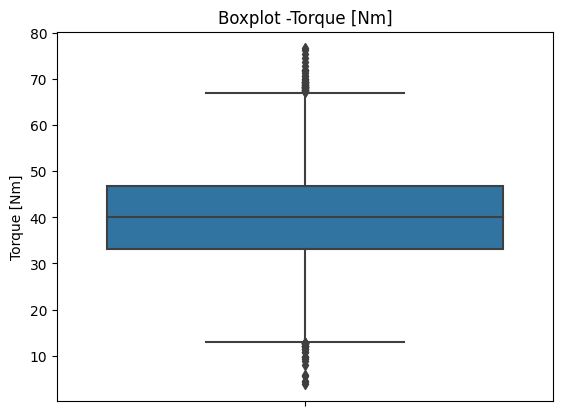

In [46]:
sns.boxplot(y='Torque [Nm]',data=df)
plt.title('Boxplot -'+'Torque [Nm]')
plt.show()

In [47]:
# outlier treatment for torque[Nm]
Q1 = df['Torque [Nm]'].quantile(0.25)
Q3 = df['Torque [Nm]'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

13.599999999999994


In [48]:
lower_quartile = Q1 -(1.5 * IQR)
upper_quartile = Q3 +(1.5 * IQR)
print('Lower quartile for Torque [Nm] : ',lower_quartile)
print('Upper quartile for Torque [Nm] : ',upper_quartile)

Lower quartile for Torque [Nm] :  12.800000000000011
Upper quartile for Torque [Nm] :  67.19999999999999


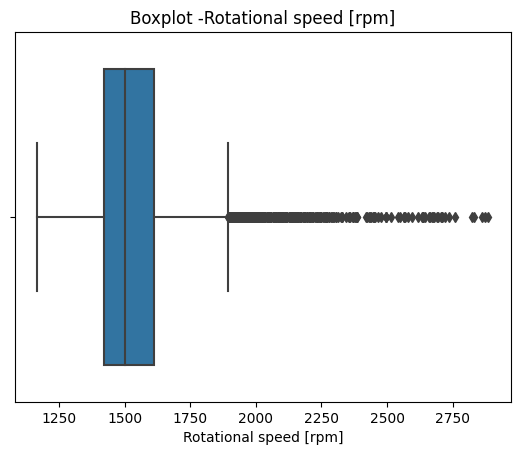

In [49]:
sns.boxplot(x= 'Rotational speed [rpm]',data = df)
plt.title('Boxplot -'+'Rotational speed [rpm]')
plt.show()

#sns.boxplot(y='Torque [Nm]',data=df)
#plt.title('Boxplot -'+'Torque [Nm]')
#plt.show()

In [50]:
#outlier treatment for rotational speed
Q1 = df['Rotational speed [rpm]'].quantile(0.25)
Q3 = df['Rotational speed [rpm]'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

189.0


In [51]:
lower_quartile = Q1 -(1.5 * IQR)
upper_quartile = Q3 + (1.5 * IQR)
print('Lower quartile for rotational speed[rpm] : ',lower_quartile)
print('Upper quartile for rotational speed[rpm] : ',upper_quartile)


Lower quartile for rotational speed[rpm] :  1139.5
Upper quartile for rotational speed[rpm] :  1895.5


In [52]:
df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341


import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5189985521615407658, *['Air temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5189985521615407658, *['Process temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5189985521615407658, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5189985521615407658, *['Torque [Nm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5189985521615407658, *['Air temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5189985521615407658, *['Process temperature [K]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5189985521615407658, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5189985521615407658, *['Torque [Nm]'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5189985521615407658 = autoviz.get_registered_df('df_5189985521615407658')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5189985521615407658, *[[['Air temperature [K]', 'Process temperature [K]'], ['Process temperature [K]', 'Rotational speed [rpm]'], ['Rotational speed [rpm]', 'Torque [Nm]'], ['Torque [Nm]', 'Tool wear [min]']]], **{})
chart

In [53]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Correlation (with the Target) : As RPM (Rotational Speed) has very low correlation with Machine failure, it is not going to be useful for the model (prediction). Therefore, we will drop this feature.

In [54]:
df.drop(['Rotational speed [rpm]'],axis=1,inplace = True)

### Balancing the data

In [55]:
!pip install imbalanced-learn

In [56]:
import imblearn
print(imblearn.__version__)

0.10.1


In [57]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Target,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,
1,M14860,2,298.1,308.6,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,40.0,9,0,0,0,0,0,0


In [58]:
X = df.iloc[:,[2,3,4,5]]
X

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min]
UDI,,,,
1,298.1,308.6,42.8,0
2,298.2,308.7,46.3,3
3,298.1,308.5,49.4,5
4,298.2,308.6,39.5,7
5,298.2,308.7,40.0,9
...,...,...,...,...
9996,298.8,308.4,29.5,14
9997,298.9,308.4,31.8,17
9998,299.0,308.6,33.4,22


In [59]:
y = df['Target']
print(y)

UDI
1        0
2        0
3        0
4        0
5        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Name: Target, Length: 10000, dtype: int64


In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
sm = SMOTE(random_state = 42)
X_res,y_res  = sm.fit_resample(X,y)
X_res.shape,y_res.shape

((19322, 4), (19322,))

In [62]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 9661, 1: 339})
Resampled dataset shape Counter({0: 9661, 1: 9661})


In [63]:
df = pd.concat([X_res,y_res],axis=1)
df.head()

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,42.8,0,0
1,298.2,308.7,46.3,3,0
2,298.1,308.5,49.4,5,0
3,298.2,308.6,39.5,7,0
4,298.2,308.7,40.0,9,0


Standardization

In [64]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#array = df.values
#scaler = StandardScaler()
#rescaled_x = scaler.fit_transform(array[:,1:5])
#rescaled_x

In [ ]:
#converting array into dataframe
#df2 = pd.DataFrame(rescaled_x,columns = ['Air Temperature [K]','Process temperature [K]','Torque [Nm]','Tool wear [min]'])
#df2.head()

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [66]:
df1.columns = (df.columns)
df1

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Target
0,0.304348,0.358025,0.535714,0.000000,0.0
1,0.315217,0.370370,0.583791,0.011858,0.0
2,0.304348,0.345679,0.626374,0.019763,0.0
3,0.315217,0.358025,0.490385,0.027668,0.0
4,0.315217,0.370370,0.497253,0.035573,0.0
...,...,...,...,...,...
19317,0.565180,0.518519,0.578316,0.830040,1.0
19318,0.338743,0.356003,0.094848,0.335968,1.0
19319,0.572559,0.628176,0.339284,0.873518,1.0
19320,0.495379,0.583463,0.345023,0.905138,1.0


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Torque [Nm]              19322 non-null  float64
 3   Tool wear [min]          19322 non-null  float64
 4   Target                   19322 non-null  float64
dtypes: float64(5)
memory usage: 754.9 KB


Splitting the data into training and testing data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df1.iloc[:,0:4]
X

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.535714,0.000000
1,0.315217,0.370370,0.583791,0.011858
2,0.304348,0.345679,0.626374,0.019763
3,0.315217,0.358025,0.490385,0.027668
4,0.315217,0.370370,0.497253,0.035573
...,...,...,...,...
19317,0.565180,0.518519,0.578316,0.830040
19318,0.338743,0.356003,0.094848,0.335968
19319,0.572559,0.628176,0.339284,0.873518
19320,0.495379,0.583463,0.345023,0.905138


In [70]:
y = df1.iloc[:,4]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19317    1.0
19318    1.0
19319    1.0
19320    1.0
19321    1.0
Name: Target, Length: 19322, dtype: float64

### Model Building

In [92]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [72]:
print('Training set :',X_train.shape,y_train.shape)
print('Test set :',x_test.shape,y_test.shape)

Training set : (15457, 4) (15457,)
Test set : (3865, 4) (3865,)


### **Logistic Regression**

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
#Create a logistic regression classifier
lr = LogisticRegression()

#Fit the classifier into training data
lr.fit(X_train,y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.7847347994825355
Classification report :               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      1822
         1.0       0.81      0.77      0.79      2043

    accuracy                           0.78      3865
   macro avg       0.78      0.79      0.78      3865
weighted avg       0.79      0.78      0.78      3865

Confusion matrix : [[1462  360]
 [ 472 1571]]


### **Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
#Create a random forest classifier
clf = RandomForestClassifier()

#Fit the classifier into training data
clf.fit(X_train,y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.9761966364812419
Classification report :               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1902
         1.0       0.98      0.97      0.98      1963

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

Confusion matrix : [[1872   30]
 [  62 1901]]


### Decision Tree


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
#Create a decision tree classifier
clf = DecisionTreeClassifier()

#Fit the classifier into training data
clf.fit(X_train,y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.959379042690815
Classification report :               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1925
         1.0       0.96      0.96      0.96      1940

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Confusion matrix : [[1851   74]
 [  83 1857]]


### SVM

In [84]:
from sklearn import svm

In [87]:
#split the data into training and testing sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

#Create a svm linear classifier
clf = svm.SVC(kernel = 'linear')

#Fit the classifier into training data
clf.fit(X_train,y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.806279109884423
Classification report :               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      2876
         1.0       0.81      0.80      0.81      2921

    accuracy                           0.81      5797
   macro avg       0.81      0.81      0.81      5797
weighted avg       0.81      0.81      0.81      5797

Confusion matrix : [[2327  549]
 [ 574 2347]]


### KNeighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
#Create a KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors = 5)

#Fit the classifier into training data
knn.fit(X_train,y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.947477360931436
Classification report :               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1801
         1.0       0.98      0.92      0.95      2064

    accuracy                           0.95      3865
   macro avg       0.95      0.95      0.95      3865
weighted avg       0.95      0.95      0.95      3865

Confusion matrix : [[1766   35]
 [ 168 1896]]


### Gaussian NB

In [91]:
from sklearn.naive_bayes import GaussianNB

In [94]:
#Create a gaussianNB classifier
gnb = GaussianNB()

#Fit the classifier into training data
gnb.fit(X_train,y_train)

# Make predictions on the test data
y_pred = gnb.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.8284605433376455
Classification report :               precision    recall  f1-score   support

         0.0       0.77      0.87      0.82      1707
         1.0       0.89      0.79      0.84      2158

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.84      0.83      0.83      3865

Confusion matrix : [[1489  218]
 [ 445 1713]]


### MultiNomialNB

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
#split the data into training and test sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

#Create a multinomialNB classifier
mnb = MultinomialNB()

#Fit the classifier into training data
mnb.fit(X_train,y_train)

# Make predictions on the test data
y_pred = mnb.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.6006555114714508
Classification report :               precision    recall  f1-score   support

         0.0       0.58      0.61      0.59      2756
         1.0       0.63      0.60      0.61      3041

    accuracy                           0.60      5797
   macro avg       0.60      0.60      0.60      5797
weighted avg       0.60      0.60      0.60      5797

Confusion matrix : [[1671 1085]
 [1230 1811]]


### Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
#split the data into training and test sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#Create a gradient boosting classifier
gb = GradientBoostingClassifier()

#Fit the classifier into training data
gb.fit(X_train,y_train)

# Make predictions on the test data
y_pred = gb.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)

Accuracy score : 0.936869340232859
Classification report :               precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1874
         1.0       0.95      0.92      0.94      1991

    accuracy                           0.94      3865
   macro avg       0.94      0.94      0.94      3865
weighted avg       0.94      0.94      0.94      3865

Confusion matrix : [[1782   92]
 [ 152 1839]]


### AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier

Accuracy score : 0.9138421733505822
Classification report :               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1935
         1.0       0.91      0.91      0.91      1930

    accuracy                           0.91      3865
   macro avg       0.91      0.91      0.91      3865
weighted avg       0.91      0.91      0.91      3865

Confusion matrix : [[1768  167]
 [ 166 1764]]


<Axes: >

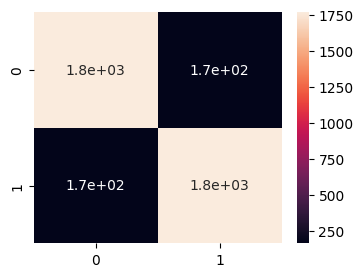

In [108]:
#split the data into training and test sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#Create a adaboost classifier
abc = AdaBoostClassifier()

#Fit the classifier into training data
abc.fit(X_train,y_train)

# Make predictions on the test data
y_pred = abc.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)
plt.figure(figsize = (4,3))
sns.heatmap(cm,annot=True)

### **Bagging**

In [127]:
from sklearn.ensemble import BaggingClassifier

Accuracy score : 0.9671410090556274
Classification report :               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1919
         1.0       0.97      0.96      0.97      1946

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865

Confusion matrix : [[1863   56]
 [  71 1875]]


<Axes: >

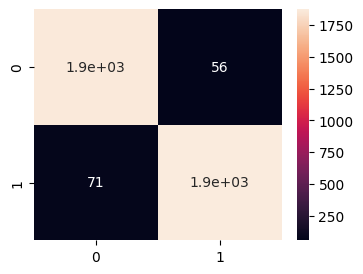

In [128]:
#split the data into training and test sets
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#Create a bagging classifier
bc = BaggingClassifier()

#Fit the classifier into training data
bc.fit(X_train,y_train)

# Make predictions on the test data
y_pred = bc.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)
plt.figure(figsize = (4,3))
sns.heatmap(cm,annot=True)

### Neural Network

In [129]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

In [131]:
#Define a neural network architecture
def create_model(units1=64,units2=32,dropout1=0.5,dropout2=0.5):
  model = Sequential()
  model.add(Dense(units1,activation='relu'))
  model.add(Dropout(dropout1))
  model.add(Dense(units2,activation='relu'))
  model.add(Dropout(dropout2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

  #create training and test set
  X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

  #create a keras classifier with default parameters
  model = KerasClassifier(build_fn = create_model,verbose=0)

  #define the hyperparameter grid to search over
  param_grid = {'units1':[32,64,128],'units2':[16,32,64],'dropout1':[0.2,0.5,0.8],'dropout2':[0.2,0.5,0.8]}

  #perform a grid search over hyper parameter grid
  grid = GridSearchCV(estimator=model,param_grid = param_grid,cv=3)
  grid_result = grid.fit(X_train,y_train)

  #print the best hyperparameter and corresponding accuarcy
  print('Best Parameters :',grid_result.best_params_)
  print('Best Accuracy :',grid_result.best_score_)

  #use the best models to predict the labels of the test set
  y_pred = grid_result.predict(X_test)

  #evaluate the accuracy of the best model on the test set
  accuracy = accuracy_score(y_pred,y_test)
  print('Accuracy :',accuracy)


In [137]:
#create training and test set
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#create a keras classifier with default parameters
model = KerasClassifier(build_fn = create_model,verbose=0)

  #define the hyperparameter grid to search over
param_grid = {'units1':[32,64,128],'units2':[16,32,64],'dropout1':[0.2,0.5,0.8],'dropout2':[0.2,0.5,0.8]}

  #perform a grid search over hyper parameter grid
grid = GridSearchCV(estimator=model,param_grid = param_grid,cv=3)
grid_result = grid.fit(X_train,y_train)

  #print the best hyperparameter and corresponding accuarcy
print('Best Parameters :',grid_result.best_params_)
print('Best Accuracy :',grid_result.best_score_)

  #use the best models to predict the labels of the test set
y_pred = grid_result.predict(x_test)
  #evaluate the accuracy of the best model on the test set
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy :',accuracy)


Best Parameters : {'dropout1': 0.2, 'dropout2': 0.2, 'units1': 128, 'units2': 64}
Best Accuracy : 0.83482559521993
182/182 [==============================] - 0s 1ms/step
Accuracy : 0.8300845264792134


In [134]:
#accuracy = accuracy_score(y_pred,y_test)
#print('Accuracy :',accuracy)


Accuracy : 0.9671410090556274


 XGB

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
#split the data into training and test sets
seed = 11
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=seed)

#Create a adaboost classifier
model = XGBClassifier()

#Fit the classifier into training data
model.fit(X_train,y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score :',accuracy)

#Classification report
report = classification_report(y_pred,y_test)
print('Classification report :',report)

#Confusion_matrix
cm =  confusion_matrix(y_pred,y_test)
print('Confusion matrix :',cm)
plt.figure(figsize = (4,3))
sns.heatmap(cm,annot=True)